## Abstract

Hi, in this task I will describe and test some Q-Learning algorithms.
This project prepared special for the subject Rainforcement Learning 2021, Technical University of Kosice.
Made by Andrii Pylypenko.

# Theory

## Introduction to Q-Learning

### Q-learning

Q-learning is a model-free reinforcement learning algorithm to learn quality of actions telling an agent what action to take under what circumstances. It does not require a model (hence the connotation "model-free") of the environment, and it can handle problems with stochastic transitions and rewards, without requiring adaptations. 

For any finite [Markov decision process (FMDP)](https://en.wikipedia.org/wiki/Markov_decision_process), Q-learning finds an optimal policy in the sense of maximizing the expected value of the total reward over any and all successive steps, starting from the current state. Q-learning can identify an optimal action-selection policy for any given FMDP, given infinite exploration time and a partly-random policy. "Q" names the function that the algorithm computes with the maximum expected rewards for an action taken in a given state.

### Q-table

Q-table is a representation of knowledges in Q-learning process. It contains states of the agent and actions for each state. It is a very important part of Q-learning process, beacause with Q-table can accumulate a policy for the agent.
To get a policy from the Q-Table you are using a Q-function.

### Q-function

The Q-function is a state based probability distribution function. It has the formal representation: $ Q(s,a) $ , where $s$ - current state of the environment, $a$ - action in current state. The $ Q(s,a) $ returns the decision propability of an action with specific state.

### Bellman's principle of optimality

 The dynamic programming method breaks this decision problem into smaller subproblems. Bellman's principle of optimality describes how to do this:

    Principle of Optimality: An optimal policy has the property that whatever the initial state and initial decision are, the remaining decisions must constitute an optimal policy with regard to the state resulting from the first decision.

As suggested by the principle of optimality, we will consider the first decision separately, setting aside all future decisions. It allows us to update the Q-table by following equation:

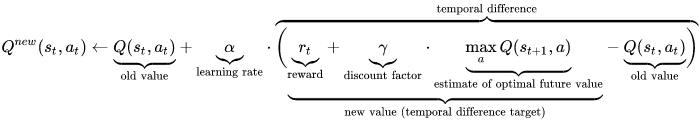

### Q-Learning process algorithm

<ul>
    <li>Initialize all Q-Values in the Q-Table arbitrary, and the Q value of terminal-state to 0</li>
    <li>Pick the action a, from the set of actions defined for that state $A(s)$ defined by the policy $π$</li>
    <li>Perform action $a_t$</li>
    <li>Observe reward $r_t$ and the next state $s_{t+1}$</li>
    <li>For all possible actions from the state $s_{t+1}$ select the one with the highest Q-Value == $a_{t+1}$</li>
    <li>Update value for the state using the Bellman's formula</li>
    <li>Repeat steps for each time step until the terminal state is reached</li>
    <li>Repeat episode for each episodes</li>
</ul>

## Introduction to SARSA

### State–action–reward–state–action (SARSA) 

is an algorithm for learning a Markov decision process policy, used in the reinforcement learning area of machine learning. It was proposed by Rummery and Niranjan in a technical note with the name "Modified Connectionist Q-Learning" (MCQ-L). The alternative name SARSA, proposed by Rich Sutton, was only mentioned as a footnote.

This name simply reflects the fact that the main function for updating the Q-value depends on the current state of the agent "S1", the action the agent chooses "A1", the reward "R" the agent gets for choosing this action, the state "S2" that the agent enters after taking that action, and finally the next action "A2" the agent chooses in its new state. The acronym for the quintuple (st, at, rt, st+1, at+1) is SARSA. Some authors use a slightly different convention and write the quintuple (st, at, rt+1, st+1, at+1), depending to which time step the reward is formally assigned. The rest of the article uses the former convention. 

### SARSA table update algorithm

A SARSA agent interacts with the environment and updates the policy based on actions taken, hence this is known as an on-policy learning algorithm. The Q value for a state-action is updated by an error, adjusted by the learning rate alpha. Q values represent the possible reward received in the next time step for taking action a in state s, plus the discounted future reward received from the next state-action observation. Formally we can describe it as: 
$$Q(s_t,a_t) \leftarrow Q(s_t,a_t) + \alpha [r_t + \gamma Q(s_{t+1}, a_{t+1}) - Q(s_t, a_t)]$$

### SARSA-learning process algorithm

<ul>
    <li>Initialize all Q-Values in the Q-Table arbitrary, and the Q value of terminal-state to 0</li>
    <li>Pick the action a, from the set of actions defined for that state $A(s)$ defined by the policy $π$</li>
    <li>Perform action $a_t$</li>
    <li>Observe reward $r_t$ and the next state $s_{t+1}$</li>
    <li>Pick action $a_{t+1}$ from the state $s_{t+1}$</li>
    <li>Update value for the state using the formula above</li>
    <li>Repeat steps for each time step until the terminal state is reached</li>
    <li>Repeat episode for each episodes</li>
</ul>

## Introduction to Double Q-learning

### Q-learning problem

The important formula $maxQ(S_{t+1}, a)$ is at the same time the biggest problem of Q-Learning. In fact, this is the reason why this algorithm performs poorly in some stochastic environments. Because of max operator Q-Learning can overestimate Q-Values for certain actions. It can be tricked that some actions are worth perusing, even if those actions result in the lower reward in the end.

Because after many iterations cumulative reward for the agent will be negative, if it take action Up from the state $t$, this action should never be taken. However, since we use max operator to update the Q-Value ,which could be positive for this action, learning agent takes this action as valid option. Meaning, estimator is taking maximum possible value instead of mean value and in this particular situation that is wrong.

### Double Q-learning

The solution for this problem was proposed by Hado van Hasselt in his 2010 [paper](https://papers.nips.cc/paper/2010/file/091d584fced301b442654dd8c23b3fc9-Paper.pdf). What he proposes is that instead using one set of data and one estimator, to use two estimators. This effectively means that instead of using one Q-Value for each state-action pair, we should use two values – $Q_A$ and $Q_B$. Technically, this approach focuses on finding action $a^*$ that maximizes $Q_A$ in the state next state $s_{t+1} – (Q(s_{t+1}, a^*) = max Q(s_{t+1}, a))$. Then it uses this action to get the value of second Q-Value – $Q_B(s’, a^*)$. Finally it uses $Q_B(s_{t+1}, a^*)$ in order to update $Q_A(s, a)$:

$$Q_A(s,a) \leftarrow Q_A(s,a) + \alpha [r + \gamma Q_B(s_{t+1},a^*) - Q_A(s,a)]$$



### Double Q-learning Algorithm

<ul>
    <li>Initialize all Q-Values in the $Q_A$ and $Q_B$ to zeros </li>
    <li>Pick starting state $s$</li>
    <li>Pick the action $a$, based on $Q_A(s,\bullet)$ and $Q_B(s,\bullet)$ get $r$ and $s_{t+1}$</li>
    <li>Pick $Update(A)$ or $Update(B)$ (random)</li>
    <li>If $Update(A)$:
        <ul>
            <li>Pick the action $a^* = argmax Q_A(s_{t+1}, a)$</li>
            <li>Update $Q_A$<br>
            $$Q_A(s,a) \leftarrow Q_A(s,a) + \alpha [r + \gamma Q_B(s_{t+1},a^*) - Q_A(s,a)]$$</li>
        </ul>
    </li>
    <li>If $Update(B)$:
        <ul>
            <li>Pick the action $a^* = argmax Q_B(s_{t+1}, a)$</li>
            <li>Update $Q_B$<br>
            $$Q_B(s,a) \leftarrow Q_B(s,a) + \alpha [r + \gamma Q_A(s_{t+1},a^*) - Q_B(s,a)]$$</li>
        </ul>
    </li>
    <li>$s \leftarrow s_{t+1}$</li>
    <li>Repeat steps for each time step until the terminal state is reached</li>
    <li>Repeat episode for each episodes</li>
</ul>

# Enough theory, let's make some tests

## Basic initialization 

In [1]:
from IPython.display import display, clear_output # To visualize game process
import matplotlib.pyplot as plt # To create an convergence graph
from libs.rla import Agent # Implementations of each algorithms above
import gym 
import time 
import numpy as np

agent = Agent()

episodes_num = 1000
steps_num = 100

## Time and convergence tests

Q-Learning time: 22.31104302406311 seconds
SARSA-Learning time: 27.436702728271484 seconds
Double Q-Learning time: 23.680003881454468 seconds


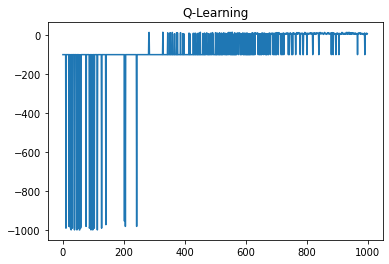

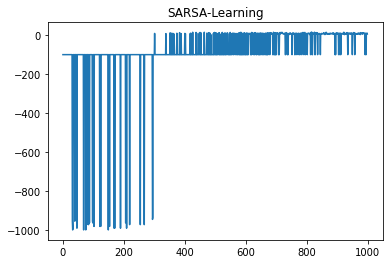

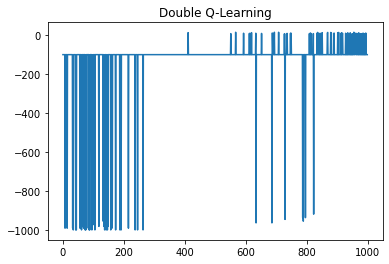

In [2]:
agent = Agent()
time_q, results_q = agent.qTraining(episodes_num, steps_num)
time_sarsa, results_sarsa = agent.sarsaTraining(episodes_num, steps_num)
time_dq, results_dq = agent.doubleQTraining(episodes_num, steps_num)

print("Q-Learning time:", time_q, "seconds")
print("SARSA-Learning time:", time_sarsa, "seconds")
print("Double Q-Learning time:", time_dq, "seconds")

plt.plot(results_q)
plt.title("Q-Learning")
plt.show()

plt.plot(results_sarsa)
plt.title("SARSA-Learning")
plt.show()

plt.plot(results_dq)
plt.title("Double Q-Learning")
plt.show()

Using same hyperparameters gives us very similar results in the procedure time, convergence and stability.
But according to the experiments above, Double Q-Learning has fastest convergence but less stable as standart Q-Learning or SARSA-Learning.

## Let's drive some taxis

In [4]:
q_table = agent.q_tables['sarsa']
env = gym.make('Taxi-v3')
episodes_num = 10
steps_num = 20
score = 0
for episode in range(episodes_num):
    state = env.reset()
    for step in range(steps_num):
        clear_output()
        display("Score: {0}".format(score))
        display(env.render())
        time.sleep(0.7)
        action = np.argmax(q_table[state,:])

        new_state, reward, isDone, _ = env.step(action)
        score += reward
            
        if isDone == True:
            break
        state = new_state
        
        
       
        

'Score: 41'

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)


None